In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.2 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 22.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138888 sha256=6975998cd78838d4f31e8458041a9c3c845ac5f895234939f36194220db18921
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/dd/16/8f/bdde4dfda69996dc9e226111ccfd4a4d247cb61b42a237c3cc
Successfully built peewee
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully 

In [2]:
import yfinance as yf
import pandas as pd

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla.history(period="max")

Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.

In [5]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64 ━━━━━━━━━━━━━━━━━━━━━━━  13.7kB /  36.0MB @ 188.4kB/s  0.1s
conda-forge/noarch   ━━━━━━━━━━━╸━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s[+] 0.2s
conda-forge/linux-64 ━╸━━━━━━━━━━━━━━━━━━━━━   4.0MB /  36.0MB @  22.7MB/s  0.2s
conda-forge/noarch   ━━╸━━━━━━━━━━━━━━━━━━━━   2.3MB /  15.4MB @  12.7MB/s  0.2s[+] 0.3s
conda-forge/linux-64 ━━━╸━━━━━━━━━━━━━━━━━━━   7.2MB /  36.0MB @  25.5MB/s  0.3s
conda-forge/noarch   ━━━━━━━╸━━━━━━━━━━━━━━━   5.5MB /  15.4MB @  19.4MB/s  0.3s[+] 0.4s
conda-forge/linux-64 ━━━━━╸━━━━━━━━━━━━━━━━━  10.4MB /  36.0MB @  27.0MB/s  0.4s
conda-forge/noarch   ━━━━━━━━━━━╸━━━━━━━━━━━   8.8MB /  15.4MB @  22.6MB/s  0.4s[+] 0.5s
conda-forge/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━  14.0MB /  36.0MB @  28.4MB/s  0.5s
conda-forge/noarch   ━━━━━━━━━━━━━━━━━╸━━━━━  12.3MB /  15.4MB @  24.8MB/s  0.5s[+] 0.6s
conda-forge/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━  15.8MB /  36.0MB @  29.0MB/s  0.6s
conda-forge/noarch  

Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [33]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

soup = BeautifulSoup(html_data, 'html.parser') 

tables = soup.find_all('table')
tesla_table = None
for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        tesla_table = table
        break

tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])


if tesla_table:
    rows = tesla_table.find_all('tr')
    for row in rows[1:]:  
        cols = row.find_all('td')
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            tesla_revenue = tesla_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index=True)

def convert_to_float(revenue_str):
    revenue_str = revenue_str.replace(',', '').replace('$', '')
    try:
        return float(revenue_str)
    except ValueError:
        return None

tesla_revenue['Revenue'] = tesla_revenue['Revenue'].apply(convert_to_float)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [34]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [41]:
gme = yf.Ticker("GME")

In [42]:
gme_data = gme.history(period="max")

In [43]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [38]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text


soup = BeautifulSoup(html_data, 'html.parser')  # or 'html5lib'


tables = soup.find_all('table')
gme_table = None
for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        gme_table = table
        break


gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])


if gme_table:
    rows = gme_table.find_all('tr')
    for row in rows[1:]:  
        cols = row.find_all('td')
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()            
            gme_revenue = gme_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index=True)


def convert_to_float(revenue_str):
    revenue_str = revenue_str.replace(',', '').replace('$', '')
    try:
        return float(revenue_str)
    except ValueError:
        return None

gme_revenue['Revenue'] = gme_revenue['Revenue'].apply(convert_to_float)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [39]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [31]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock)
    #xaxis_rangeslider_visible=True)
    fig.show()

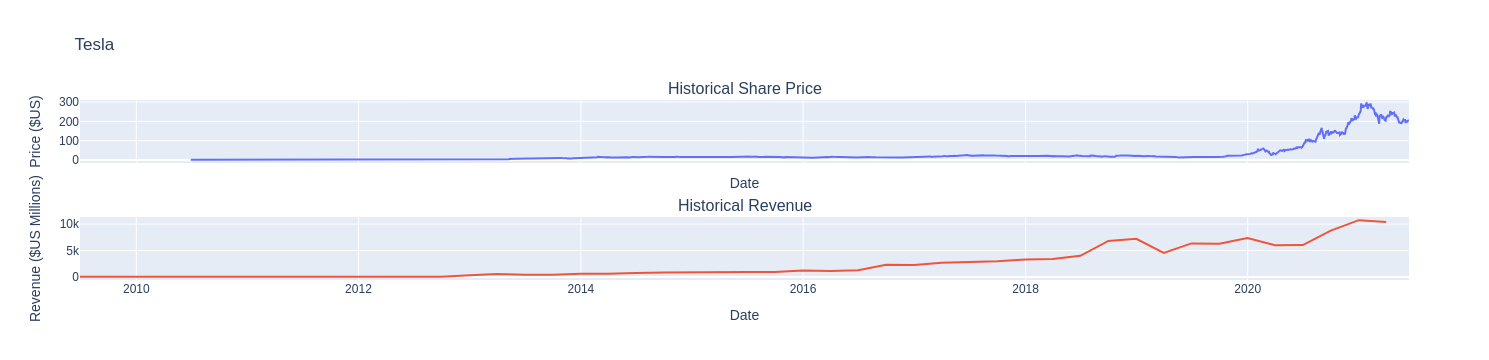

In [32]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

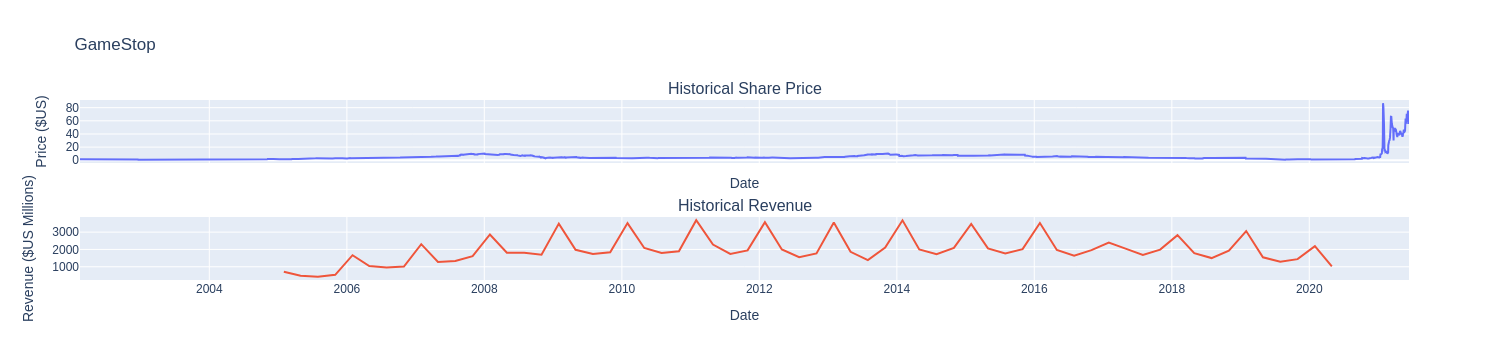

In [45]:
make_graph(gme_data, gme_revenue, 'GameStop')